# Questions

# 1.a

In [1]:
import matplotlib.pyplot as plt
import collections
import networkx as nx
import numpy as np
import scipy as sp
import random

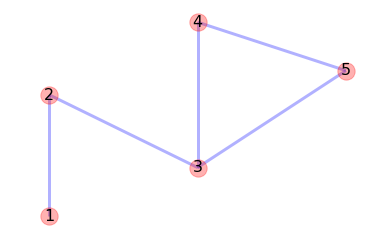

In [2]:
G = nx.Graph()

# Add network
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(4, 5)

# set layout
pos = {1:(1,1),2:(1,3.5),3:(2,2),4:(2,5),5:(3,4)}

# draw nodes
nx.draw_networkx_nodes(G, pos, alpha=0.3)

# draw edges
nx.draw_networkx_edges(G, pos, width=3, alpha=0.3, edge_color='b')

# draw labels
nx.draw_networkx_labels(G, pos, font_size=16)

# plot plot
plt.axis('off')
plt.show()


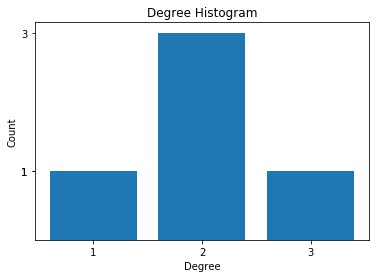

In [3]:
# Degree histogram
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_yticks([c for c in cnt])
plt.show()

# 1.b

In [4]:
# create adjacency matrix
amatrix = nx.adjacency_matrix(G)
amatrix = amatrix.todense()
print(amatrix)

[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 1]
 [0 0 1 0 1]
 [0 0 1 1 0]]


# 1.c

In [5]:
# degree centrality
# the sum of the line of the adjency matrix corresponding to each node, divided by (the number of nodes -1) 
print("the degree centrality for nodes")
degree_centrality = {}
for i in range(len(amatrix)):
    degree_centrality[i+1] = np.sum(amatrix[i])/(len(amatrix)-1)
print(degree_centrality,"\n")

# degree closeness
# per node the sum of te closest distances to other nodes, divided by the nodes-1, to the power -1
print("the closeness centrality for nodes")
closeness_centrality ={}
closeness_centrality[1] = ((1+2+3+3)/4)**-1
closeness_centrality[2] = ((1+1+2+2)/4)**-1
closeness_centrality[3] = ((2+1+1+1)/4)**-1
closeness_centrality[4] = ((1+1+2+3)/4)**-1
closeness_centrality[5] = ((1+1+2+3)/4)**-1
print(closeness_centrality)

the degree centrality for nodes
{1: 0.25, 2: 0.5, 3: 0.75, 4: 0.5, 5: 0.5} 

the closeness centrality for nodes
{1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8, 4: 0.5714285714285714, 5: 0.5714285714285714}


In [6]:
# calculated using a library to check for correctness
print("the degree centrality for nodes")
print(nx.degree_centrality(G),"\n")
print("the closeness centrality for nodes")
print(nx.closeness_centrality(G))

the degree centrality for nodes
{1: 0.25, 2: 0.5, 3: 0.75, 4: 0.5, 5: 0.5} 

the closeness centrality for nodes
{1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8, 4: 0.5714285714285714, 5: 0.5714285714285714}


# 1.d

In [7]:
print("The vector of the degree per vertex:")
for i in range(len(amatrix)):
    print("node",i+1,"->",np.sum(amatrix[i]))

The vector of the degree per vertex:
node 1 -> 1
node 2 -> 2
node 3 -> 3
node 4 -> 2
node 5 -> 2


# 1.e

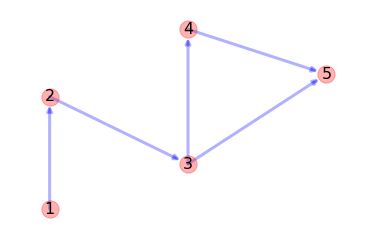

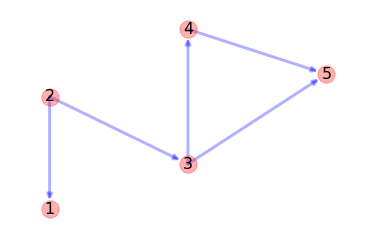

In [8]:
H = nx.DiGraph()

# Add network
H.add_edge(1, 2)
H.add_edge(2, 3)
H.add_edge(3, 4)
H.add_edge(3, 5)
H.add_edge(4, 5)

pos = {1:(1,1),2:(1,3.5),3:(2,2),4:(2,5),5:(3,4)}
nx.draw_networkx_nodes(H, pos, alpha=0.3)
nx.draw_networkx_edges(H, pos, width=3, alpha=0.3, edge_color='b')
nx.draw_networkx_labels(H, pos, font_size=16)
plt.axis('off')
plt.show()


H = nx.DiGraph()

# Add network
H.add_edge(2, 1)
H.add_edge(2, 3)
H.add_edge(3, 4)
H.add_edge(3, 5)
H.add_edge(4, 5)

pos = {1:(1,1),2:(1,3.5),3:(2,2),4:(2,5),5:(3,4)}
nx.draw_networkx_nodes(H, pos, alpha=0.3)
nx.draw_networkx_edges(H, pos, width=3, alpha=0.3, edge_color='b')
nx.draw_networkx_labels(H, pos, font_size=16)
plt.axis('off')
plt.show()



As can be seen from the two plotted networks, between node 1 and node 2 only two possible directions can exist. In the top plot, from node 2 node 1 can't be reached. In the bottom plot, from node 1 node 2 can't be reached. Thus, no such ’directionalization’ exists such that from all vertices you could reach (or infect) the entire network.

# 1.f

In [9]:
# https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/
print("Local clustering coefficient")
print(nx.clustering(G))

Local clustering coefficient
{1: 0, 2: 0, 3: 0.3333333333333333, 4: 1.0, 5: 1.0}


# 1.g

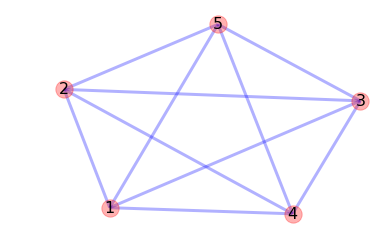

5 edges need to be added for the following local clustering coefficients:
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}


In [10]:
G = nx.Graph()

# add network
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(4, 5)

# add minimum number of edges (5) so that the clustering coefficient is 1 for every vertex
# this is the minimum because every vertex has to be connected to overy other vertex
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(2, 4)
G.add_edge(2, 5)

# set layout
pos = nx.spring_layout(G)

# draw nodes
nx.draw_networkx_nodes(G, pos, alpha=0.3)

# draw edges
nx.draw_networkx_edges(G, pos, width=3, alpha=0.3, edge_color='b')

# draw labels
nx.draw_networkx_labels(G, pos, font_size=16)

# plot plot
plt.axis('off')
plt.show()

print("5 edges need to be added for the following local clustering coefficients:")
print(nx.clustering(G))

# 2.a

# 2.b

# 2.c

# 2.d

# 2.e